In [4]:
# HIV Therapy Centre Analysis in India - 2023

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("hiv_therapy.csv")
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (136, 9)
  Country                        State                              Year  \
0   India  Andaman And Nicobar Islands  Financial Year (Apr - Mar), 2023   
1   India               Andhra Pradesh  Financial Year (Apr - Mar), 2023   
2   India            Arunachal Pradesh  Financial Year (Apr - Mar), 2023   
3   India                        Assam  Financial Year (Apr - Mar), 2023   
4   India                        Bihar  Financial Year (Apr - Mar), 2023   

   Antiretroviral Therapy (Art) Centres (UOM:Number), Scaling Factor:1  \
0                                                1.0                     
1                                               59.0                     
2                                                2.0                     
3                                                9.0                     
4                                               29.0                     

   Centre Of Excellence (UOM:Number), Scaling Factor:1  \
0               

In [6]:
# Clean Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w\s]', '', regex=True)


In [8]:
# Rename Long Columns for Simplicity
df = df.rename(columns={
    'antiretroviral_therapy_art_centres_uomnumber_scaling_factor1': 'art_centres',
    'centre_of_excellence_centre_of_excellence_adult_uomnumber_scaling_factor1': 'coe_adult',
    'centre_of_excellence_centre_of_excellence_paediatric_uomnumber_scaling_factor1': 'coe_paediatric',
    'link_antiretroviral_therapy_art_centres_uomnumber_scaling_factor1': 'link_art_centres',
    'care_support_centres_uomnumber_scaling_factor1': 'care_support_centres'
})

In [10]:
# Step 4: Drop Empty/Redundant Columns

df = df.drop(columns=['centre_of_excellence_uomnumber_scaling_factor1'])

In [12]:
# Extract Year as Integer
df['year'] = df['year'].str.extract(r'(\d{4})').astype(int)

In [14]:
# Step 6: Handle Missing Values
missing_summary = df.isnull().sum()
print("\nMissing values per column:\n", missing_summary)


Missing values per column:
 country                   0
state                     0
year                      0
art_centres               0
coe_adult                92
coe_paediatric          108
link_art_centres          8
care_support_centres     12
dtype: int64


In [16]:
# Fill missing with 0 for numerical columns
numerical_cols = ['art_centres', 'coe_adult', 'coe_paediatric', 'link_art_centres', 'care_support_centres']
df[numerical_cols] = df[numerical_cols].fillna(0)

In [18]:
# Check Data Types and Summary

print("\nData types:\n", df.dtypes)
print("\nStatistical summary:\n", df.describe())


Data types:
 country                  object
state                    object
year                      int32
art_centres             float64
coe_adult               float64
coe_paediatric          float64
link_art_centres        float64
care_support_centres    float64
dtype: object

Statistical summary:
               year  art_centres   coe_adult  coe_paediatric  link_art_centres  \
count   136.000000   136.000000  136.000000      136.000000        136.000000   
mean   2021.500000    20.345588    0.323529        0.205882         37.419118   
std       1.122167    23.027394    0.469552        0.405840         65.889957   
min    2020.000000     0.065619    0.000000        0.000000          0.000000   
25%    2020.750000     3.000000    0.000000        0.000000          3.912507   
50%    2021.500000    12.000000    0.000000        0.000000         11.500000   
75%    2022.250000    27.000000    1.000000        0.000000         32.000000   
max    2023.000000   103.000000    1.000000  

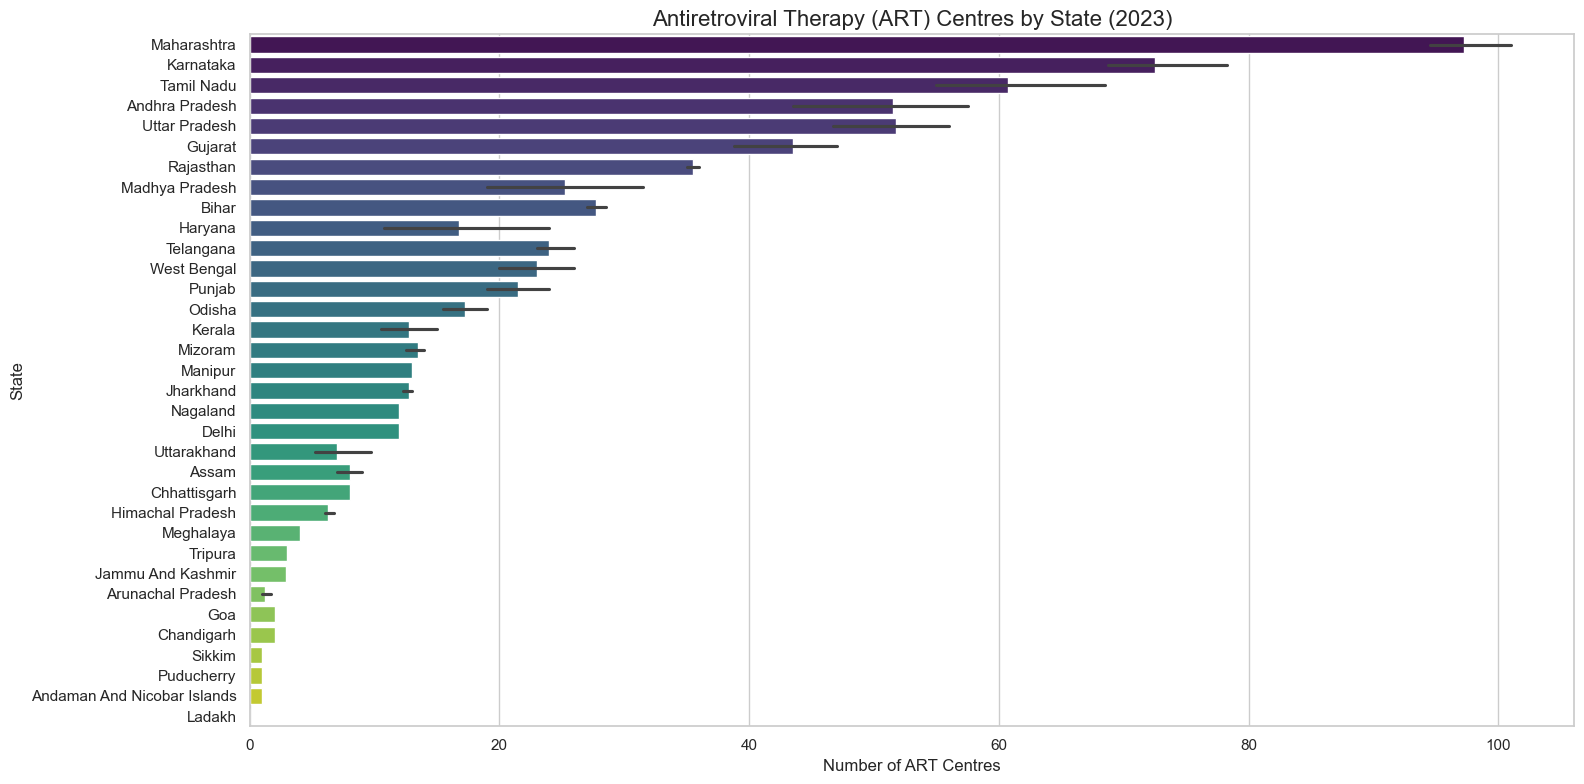

In [20]:
# Visualization 1: ART Centres per State
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
art_sorted = df.sort_values(by='art_centres', ascending=False)
sns.barplot(data=art_sorted, x='art_centres', y='state', hue='state', palette='viridis', legend=False)
plt.title('Antiretroviral Therapy (ART) Centres by State (2023)', fontsize=16)
plt.xlabel('Number of ART Centres')
plt.ylabel('State')
plt.tight_layout()
plt.show()


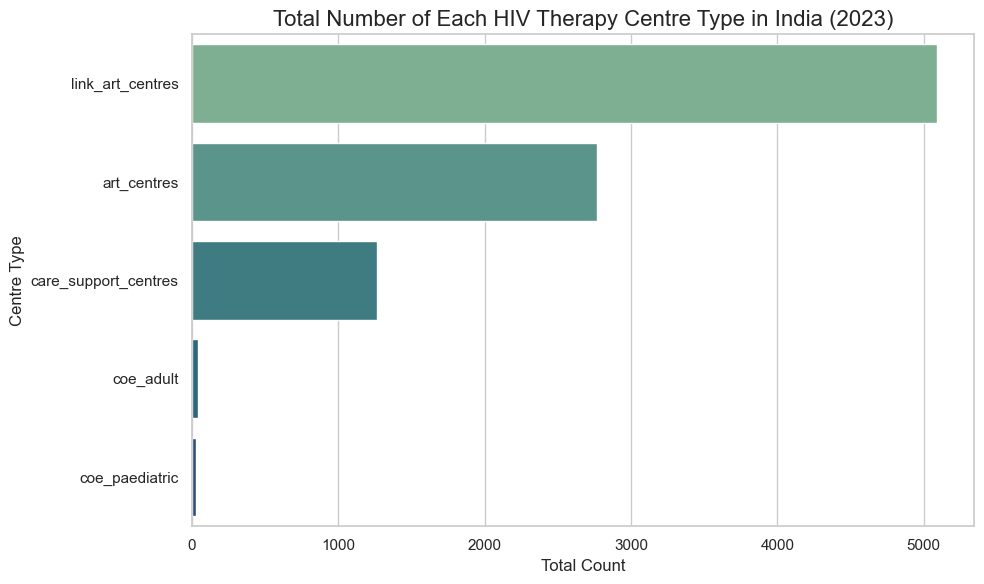

In [24]:
# Visualization 2: Total number of each type of centre across India

total_counts = df[numerical_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_counts.values, y=total_counts.index, hue=total_counts.index, palette='crest', dodge=False, legend=False)
plt.title('Total Number of Each HIV Therapy Centre Type in India (2023)', fontsize=16)
plt.xlabel('Total Count')
plt.ylabel('Centre Type')
plt.tight_layout()
plt.show()

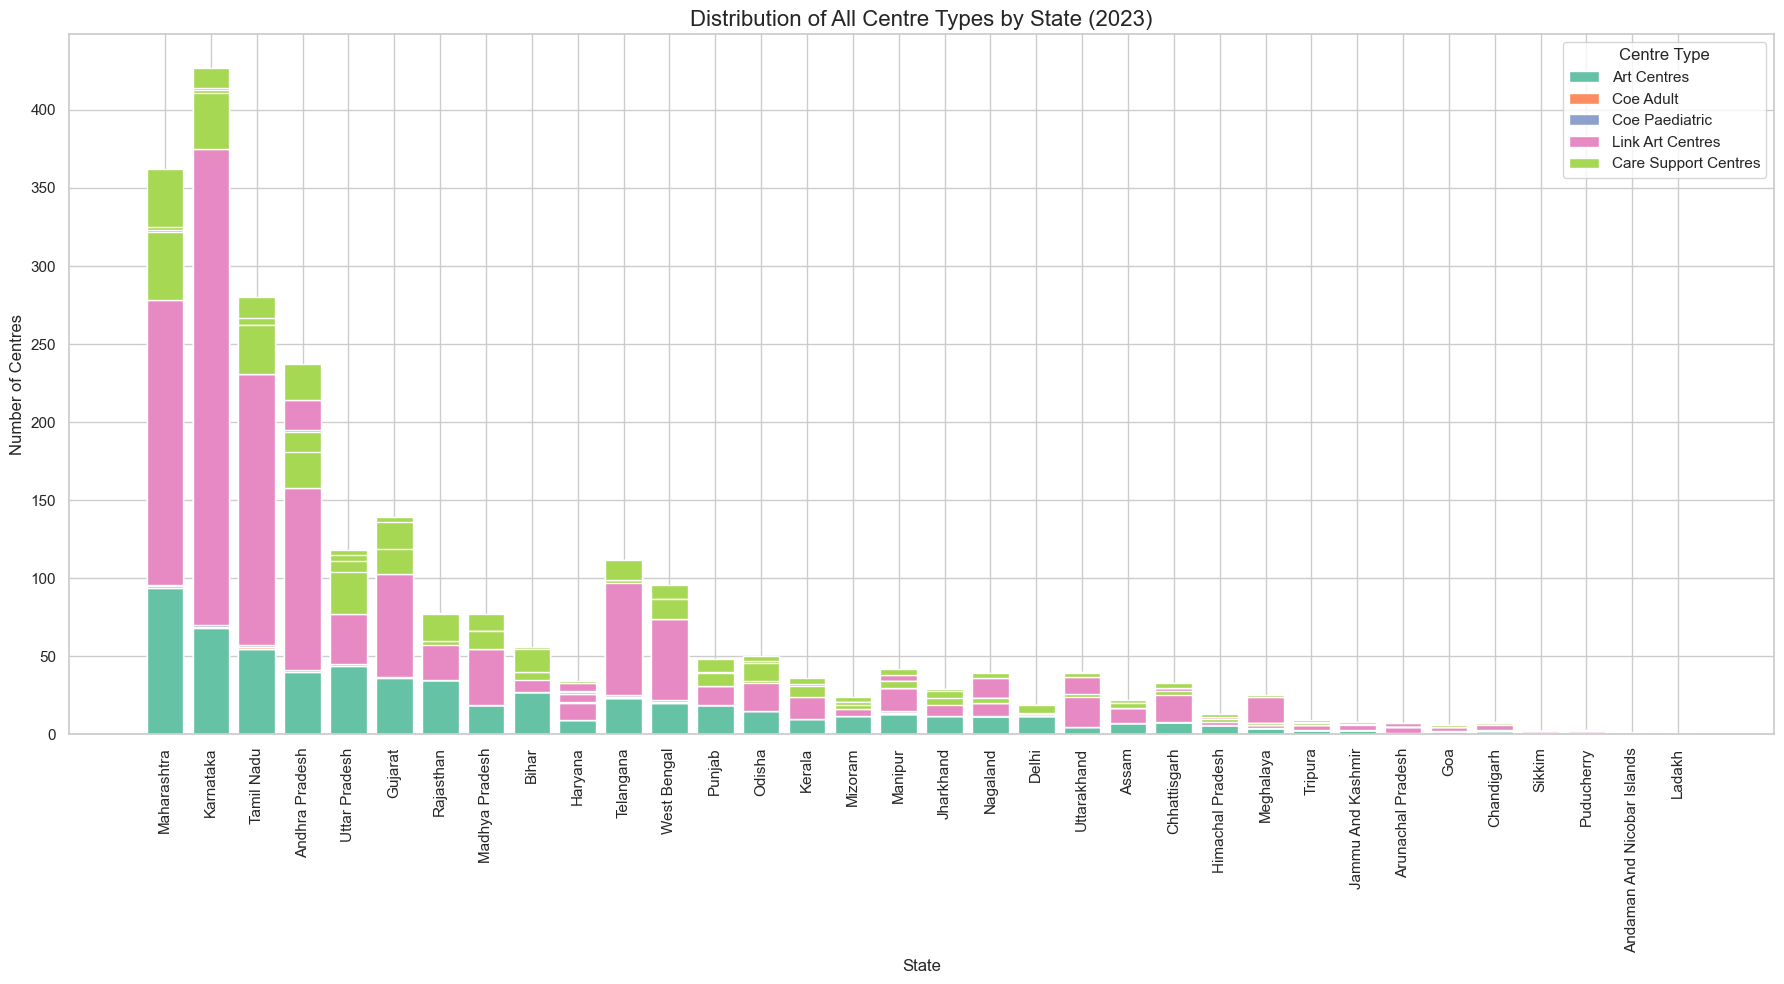

In [28]:
# Stacked Bar Plot of Centre Types by State

df_sorted = df.sort_values(by='art_centres', ascending=False)

plt.figure(figsize=(18, 10))
bottom = [0] * len(df_sorted)
colors = sns.color_palette('Set2', len(numerical_cols))

for i, centre in enumerate(numerical_cols):
    plt.bar(df_sorted['state'], df_sorted[centre], bottom=bottom, label=centre.replace('_', ' ').title(), color=colors[i])
    bottom = [bottom[j] + df_sorted[centre].values[j] for j in range(len(bottom))]

plt.xticks(rotation=90)
plt.title('Distribution of All Centre Types by State (2023)', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Centres')
plt.legend(title='Centre Type')
plt.tight_layout()
plt.show()

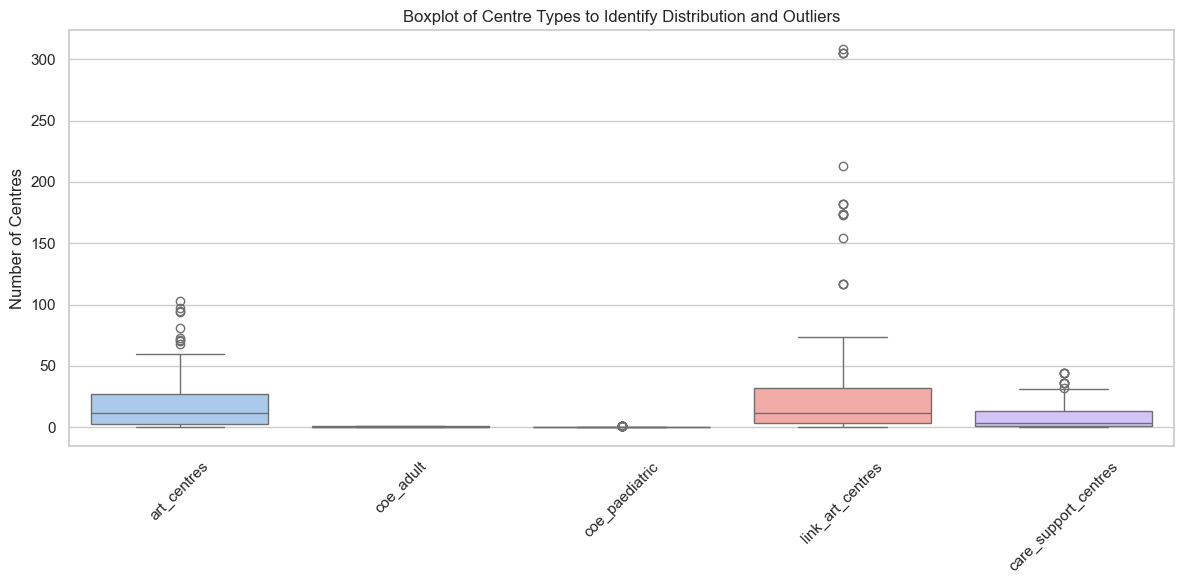

In [30]:
# Visualization 4: Boxplots to Detect Outliers and Spread
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], palette="pastel")
plt.title("Boxplot of Centre Types to Identify Distribution and Outliers")
plt.ylabel("Number of Centres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

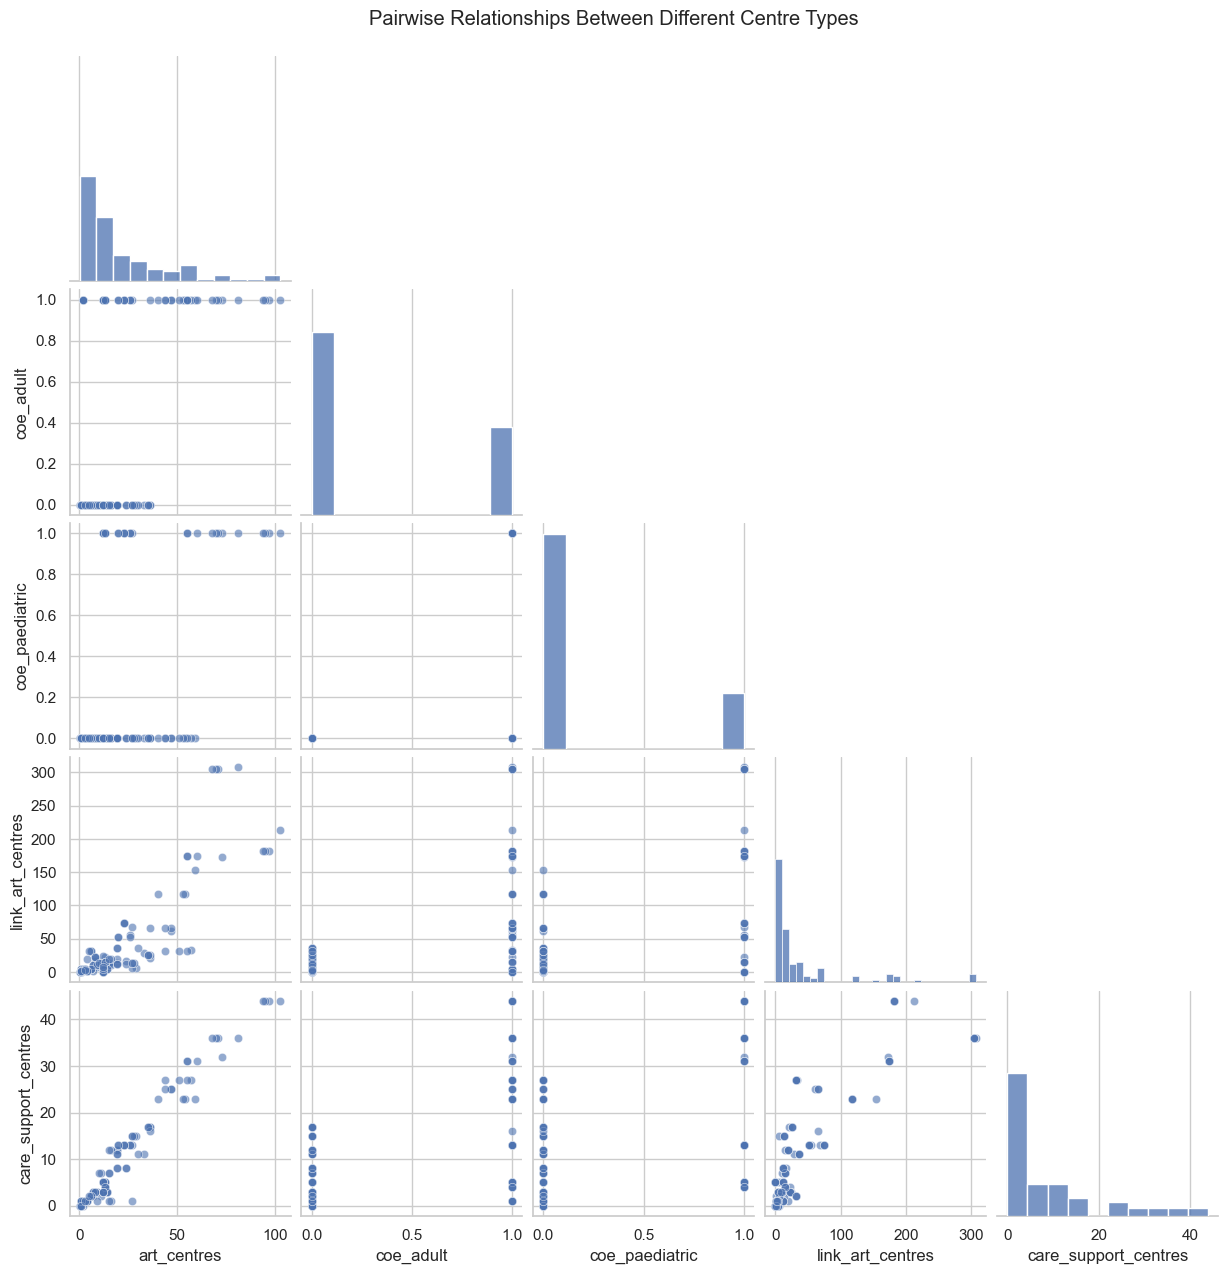

In [34]:
# Visualization 5: Pairplot for Correlation Between Centres

sns.pairplot(df[numerical_cols], corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships Between Different Centre Types", y=1.02)
plt.show()

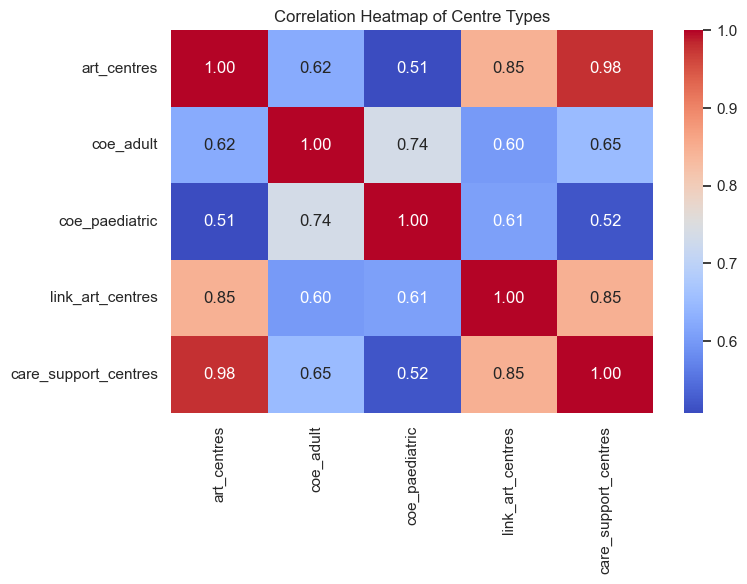

In [36]:
# Visualization 6: Correlation Heatmap

plt.figure(figsize=(8, 6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Centre Types")
plt.tight_layout()
plt.show()

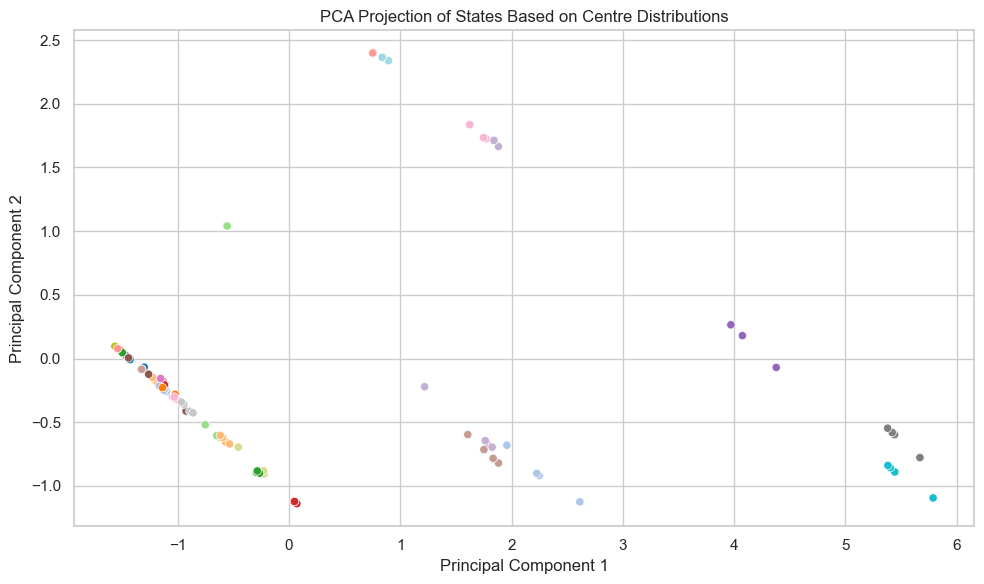

In [46]:
# Bonus 1: PCA for Dimensionality Reduction
# ----------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])
from sklearn.decomposition import PCA  
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='state', data=df, palette='tab20', legend=False)
plt.title("PCA Projection of States Based on Centre Distributions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


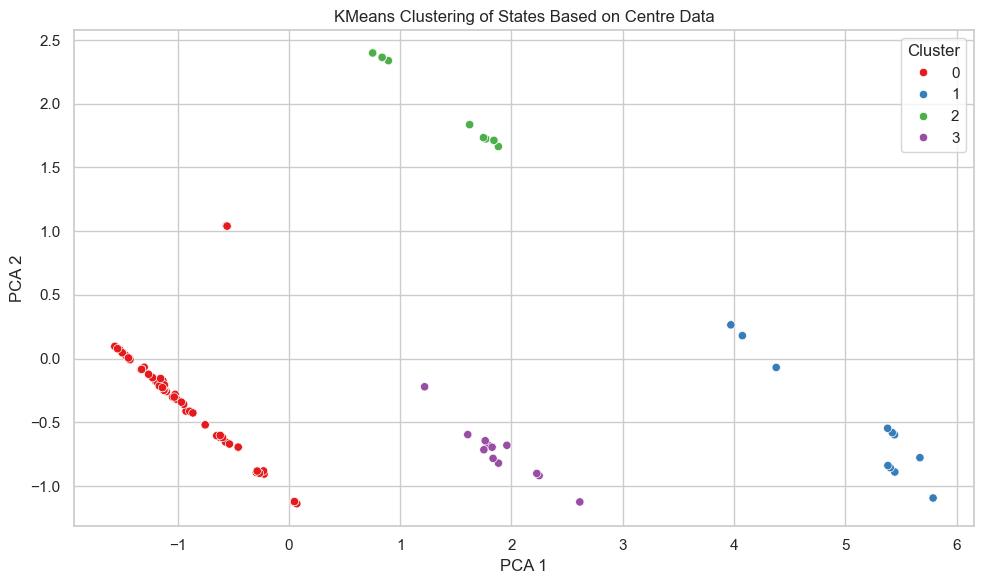

In [60]:
# Clustering States by Centre Distribution
#OMP_NUM_THREADS=1
#kmeans = KMeans(n_clusters=4, random_state=42)
#df['cluster'] = kmeans.fit_predict(scaled_data)
import os
from sklearn.cluster import KMeans

# Clustering States by Centre Distribution
os.environ['OMP_NUM_THREADS'] = '1'
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set1')
plt.title("KMeans Clustering of States Based on Centre Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [62]:
# Summary Table Output

summary = df.groupby('cluster')[numerical_cols].mean().round(2)
print("\nAverage Centre Count by Cluster:")
print(summary)


Average Centre Count by Cluster:
         art_centres  coe_adult  coe_paediatric  link_art_centres  \
cluster                                                             
0              10.10       0.04             0.0              9.90   
1              76.83       1.00             1.0            223.08   
2              18.00       1.00             1.0             35.56   
3              48.92       1.00             0.0             74.42   

         care_support_centres  
cluster                        
0                        4.08  
1                       37.08  
2                        8.75  
3                       24.25  
